In [3]:
!pip install tensorflow


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [15]:
df = pd.read_csv("../data/cleaned_sales.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df


,Sales
Date,
2018-01-01,450
2018-01-02,470
2018-01-03,465


In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Sales']])
scaled_data


array([[0.  ],
       [1.  ],
       [0.75]])

In [17]:
X = []
y = []

for i in range(1, len(scaled_data)):
    X.append(scaled_data[i-1])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

X = X.reshape((X.shape[0], 1, 1))

X, y


(array([[[0.]],
 
        [[1.]]]),
 array([[1.  ],
        [0.75]]))

In [18]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()


C:\Users\samik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X, y, epochs=50, verbose=1)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.7696
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.7648
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.7601
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.7554
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 0.7506
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.7459
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.7412
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.7366
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.7320
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.7274
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.7228
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.7182
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.7136
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.7090
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.7045
Epoch 16/50
1/1 ━━━━━━━━━━

In [20]:
last_value = scaled_data[-1]

future_predictions = []

for i in range(5):
    input_data = last_value.reshape((1, 1, 1))
    prediction = model.predict(input_data, verbose=0)
    future_predictions.append(prediction[0, 0])
    last_value = prediction

future_predictions


[np.float32(0.19241229),
 np.float32(0.11800362),
 np.float32(0.10809083),
 np.float32(0.10677736),
 np.float32(0.10660344)]

In [21]:
future_predictions = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1)
)

future_predictions


array([[453.84824],
       [452.36008],
       [452.16183],
       [452.13556],
       [452.13208]], dtype=float32)

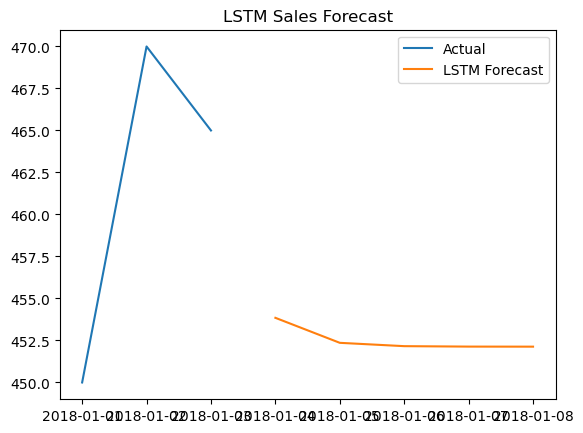

In [22]:
future_dates = pd.date_range(
    start=df.index[-1] + pd.Timedelta(days=1),
    periods=5
)

plt.figure()
plt.plot(df.index, df['Sales'], label="Actual")
plt.plot(future_dates, future_predictions, label="LSTM Forecast")
plt.legend()
plt.title("LSTM Sales Forecast")
plt.show()
